In [2]:
from IPython.display import Image

## Sampling in Monto-Carlo Metropolis method for 2D Ising model 

A stochastic process is a sequence of random variables indexed by a parameter. Random variables constitute a state $\chi(t)$ of the stochastic process at time 't'. The set of all such states which include all possible realization of $\chi(t)$ defines a state space denoted 'S'.
<br>
<br>
The time or any parameter in parameter space can take descrete or continuous values. For example t={0, 1,2,...} or t=(0,$\infty$). Similarly a state space can be descrete or continuous. 
<br>
<br>
A descrete parameter stochastic process { $\chi(t)$, t= 0, 1, 2, ... } or a continuous parameter process { $\chi(t)$, t $\ge$ 0 }is called a Markov process if the probability distribution of future states depends only on the present (or the most recently observed) state but not on the past states. 
Markov process with a descrete state space is called Markov chain. 

### Metropolis Method

1. Start with a random spin configuration
2. Choose an element in the 2D array randomly(Monte Carlo).
3. Flip the spin of that chosen site. 
4. Calculate the cost with respect to flipped site by considering spin values of the nieghbouring site.
5. If the energy (=$\sum neighbours$*(spin value at the chosen site)) is less than zero, accept the change.
6. Else from a random comparision flip the spin and accept the change. 


In [7]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='spin _flip.png'></td><td><img src='delta_E.png'></td></tr></table>"))


## Theory
In this section we discuus how to use Monte-Carlo simulations in a useful way to evaluate the observables of a magnetic material. Here a stochastic process is used and Metropolis-Hestings algorithm is applied. Task is to show the process of magnetization in  a ferromagnet using a 2D Ising model. 
<br>
<br>
Using an Ising model one can investigate the properties of two dimensional ferromagnet with respect to its magnetization and energy at varying temperatures.
<br>
<br>
In general ,aterials are associated with magnetic dipoles of the atoms. These dipoles have a random orientation. Because of this random distribution there will not be any overall macroscopic magnetic moent. But in case of a ferromagnetic materials like iron, magnetic moment is produced as a result of alignment of atomic spins in a preferred direction. This phenomenon is based on energy minimization and entropy maximization. Temperature is the mediator between thses two effects and determines which will be more dominant. 
<br>
<br>
The importance of energy and temperature is governed by a probability P, 
\begin{equation}
P=exp\left( - \frac{E}{k_{b} T}\right)
\end{equation}
Where $k_{b}$ is Boltzmann constant. And this distribution  is called Gibbs distribution. 
<br>
<br>
### Ising Model
The Ising model is a 2D model and it has dipole spins at regular lattice points with their spin axis to be either up (+) or down (-). The lattice has square dimension of length 'L' and has a total number of spins N = LxL. We take simplest case by restricting range of spin interactions to immediately adjecent sites (nearest neighbours). Such system has a hamiltonian for a specific spin 'i' as 
\begin{equation}
H_i = -J \sum_{<ij>} s_i s_j
\end{equation}
Where $\sum_{<ij>}$ considers only the nearest neighbours of 'i'. The coupling constant for neighbours is represented by 'J', while $s_i$ and $s_j$ are the respective nearest neighbour spins. Sign of 'J' determines the nature of material that we are modeling. If 'J' is positive it would mean that the material has a ferromagnetic property (parallel spin alignment, while negative sign imply for an anti-ferromagnetic nature (anti-parallel spins).

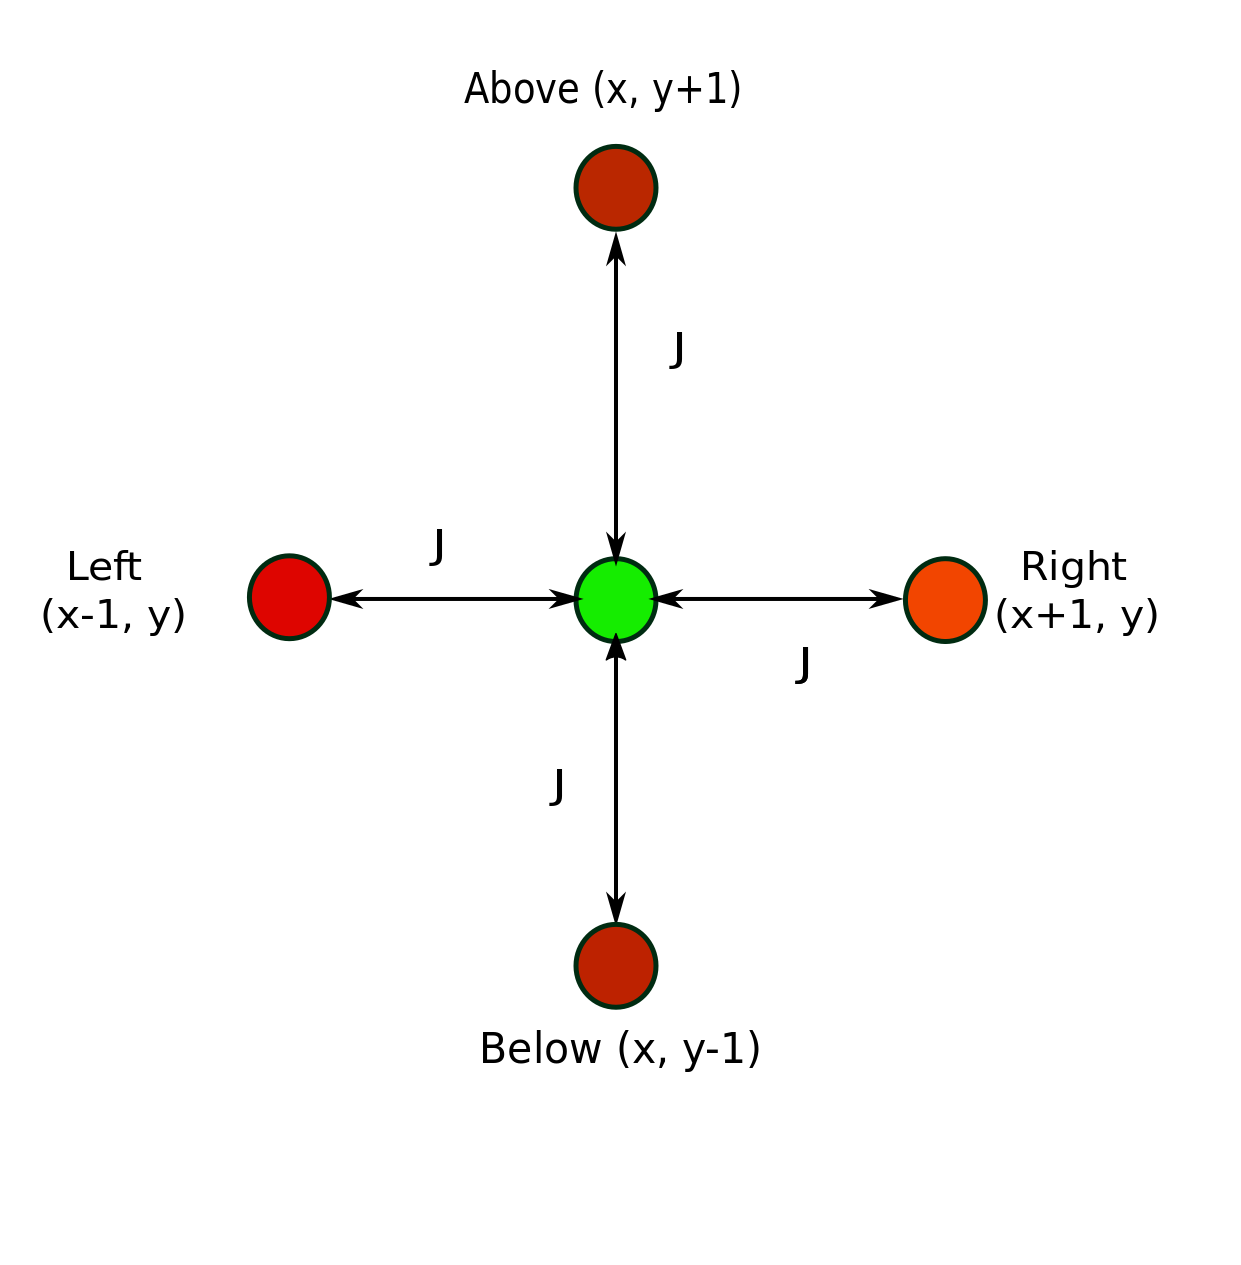

In [4]:
Image(filename="NB_ising.png", width=400, height=400)

In the above figure, nearest neighbouring coupling is shown. The green dot at a lattice position (x,y) is spin interacting with its nearest neighbours which are one lattice spacing away from it. 
<br>
<br>
To take complete spin interaction and maximize the interaction of spins at the edges, they are made to interact with the spins at the geometric opposite edges of the lattice. This is called periodic boundary condition (pbc).
We can visualize it better if we identify the opposite edges of the 2D square lattice and fold them into a 3D torus with spins being on the surface of this topological structure. 
<br>
<br>
By using Ising model we can calculate the solution for observables. If we take energy of all possible states of the system, the equation (1) gives the probability for the system to be in each possible states for a given temperature. Therefore macroscopic quantities can be calculated by knowing probabilities and taking their sum.
For example, magnetization $M(\alpha)$  for a fixed state $\alpha$, is proportional to excess of number of spins pointing up or down. 
\begin{equation}
M(\alpha)=N_{up} \sim N_{down}
\end{equation}
Expectation value is given by 
\begin{equation}
<M>=\sum_{\alpha} M(\alpha) P(\alpha)
\end{equation}
And for energy 
\begin{equation}
<E>=\sum_{\alpha} E(\alpha) P(\alpha)
\end{equation}
<br>
<br>
Calculation of above expectation values is a very difficult task when solving on a computer. The problem arises because of the size of the state space. If we have two spin orientations up(+) and down(-), and if there are N such spins then possible number of states would be $2^N$. If N becomes large it is evident that computation becomes cumbersome if calculated in this manner. 
<br>
<br>
The way to deal with this problem could be a computational simulation. Since equations involve probabilities in calculating averages, usual computation efforts might not be a successful one. Thus computational simulation must be a stochastic model by nature.
<br>
<br>
One of the solutions to this problem is to generate data over the representative states. These representative states constitute the appropriate proportions of different states. This is a biased sampling technique which generates samples that they satisfy the actual probabilities from the theory.  
<br>
<br>
### Sampling and Average
Consider an observable A(x), defined in the canonical ensemble. The average for 'A' in some teperature 'T' is given by
\begin{equation}
<A(x)>_T =\frac{1}{Z} \int e^{- \beta H(x)} dx 
\end{equation}
Where 'x' is a vector in phase space and $\beta=\frac{1}{k_b T}$. 
<br>
Partition function 'Z' used above is given by 
\begin{equation}
Z= \int e^{- \beta H(x)} dx
\end{equation}
<br>
The probability P(x) can be calculated as 
\begin{equation}
P(x)=\frac{1}{Z} e^{- \beta H(x)}
\end{equation}
<br>
This probability is the statistical weight with which the configuration 'x' occurs in the thermal equilibrium. 
<br>
Now if we consider the descrete case, expectation value for an observable will be of the form 
\begin{equation}
<A(x)>=\frac{\sum_{l=1}^M e^{- \beta H(x_l)} A(x_l)}{\sum_{l=1}^M e^{- \beta H(x_l)}}
\end{equation}
If we take $M\rightarrow \infty$ in the above equation it would reduce to equation (6). But there is a problem in taking above defination for the average in the phase space. Since it wont guarrantee that the probability distribution will have peak in the region of consideration (Not representative). So the smarter technique will be to consider the defination of P(x) while calculating average. With which one can make sure that the important part of the phase space is included. We choose a process that can select $x_l$ with an associated probability distribution $P(x_l)$ in the phase space for estimating thermal average then, 
\begin{equation}
<A(x)>=\frac{\sum_{l=1}^M e^{- \beta H(x_l)} A(x_l)/P(x_l)}{\sum_{l=1}^M e^{- \beta H(x_l)}/P(x_l)}
\end{equation}
One of the choice for $P(x_l)$ will be $P(x_l) \propto e^{- \beta H(x_l)}$. This produces a simple arithmetic average for A(x) by canceling Boltzmann factor.      
\begin{equation}
<A(x)>=\frac{1}{M} \sum_{l=1}^M A(x_l)
\end{equation}

While doing so we are attempting to reduce a probability distribution at equilibrium of the infinite phase space to a representative distribution with a finite set of points from phase space $x_l$. 
<br>
<br>
Now our task is generate such distribution. That is done by invoking Metropolis algorithm. It uses Markov process for constructing a distribution, where each state $x_{l+1}$ is constructed from a previous state $x_l$ via suitable transition probability $W(x_l\rightarrow x_{l+1})$. To implement this idea a detailed balnce condition has to be satisfied. That is 
\begin{equation}
P_{eq}(x_l) W(x_l \rightarrow x_{l^{\prime}})=P_{eq}(x_{l^{\prime}}) W(x_{l^{\prime}} \rightarrow x_l )
\end{equation}
Above equation says that, at equilibrium there is an equal probability for $x_l \rightarrow x_{l^{\prime}}$ and $x_{l^{\prime}} \rightarrow x_l$ transition. By taking ratio, transition probability for a move $x_l \rightarrow x_{l^{\prime}}$ and for a inverse move $x_{l^{\prime}} \rightarrow x_l$ only depends on the energy change $\delta H=H(x_{l^{\prime}})-H(x_l)$. The ratio becomes, 
\begin{equation}
\frac{W(x_l \rightarrow x_{l^{\prime}})}{W(x_{l^{\prime}} \rightarrow x_l)} =e^{-\delta H \beta}
\end{equation}

There is a relationship between probability distribution and transition probability. It is given by Markovian master equation. 
\begin{equation}
\frac{dP(x,t)}{dt} = - \sum_{x^{\prime}}W(x_l \rightarrow x_{l^{\prime}}) + \sum_{x^{\prime}} W(x_{l^{\prime}} \rightarrow x_l)
\end{equation}

If our system reaches a state in which two terms on the right hand side exactly cancel one another for all 'x'. Then rate of change of $P(x,t)/dt$ will vanish and $P(x,t)$ will be a constant over time. This is an equilibrium state. Since the master equation is first order with real parameters and $0\leq P(x,t) \leq 1$ implies that all the systems governed by above equation must come to equilibrium in the end. 

<br>
<br>
If we take equation (12) and impose a condition on $P_{eq}(x_l)$ as $P_{eq}(x_l)=P_{eq}(x_{l^{\prime}})$, then equation (14) results in  $dP(x,t)/dt=0$. Since we are considering finite system, above arguments says that the system involves equilibrium states whose transition probabilities are unvarying. Such systems are called ergodic systems. In statistics ergodicity means stationarity. 
<br>
<br>
consider $$<A(t)>=\frac{1}{t_M} \int A(t) dt$$ this equation and if we take number of Monte-Carlo steps as a unit of time then 
\begin{equation}
<A(t)>=\frac{1}{M} \sum_{t=1}^M A(x(t))
\end{equation}

The Metropolis sampling can be treated as time average along a stochastic trajectory in phase space. 
### Calculation of Observables
Observables $<E>$, $<E^2>$, $<M>$, $<M^2>$, are calculated in the following way, 

\begin{equation}
<M> = \frac{1}{N} \sum_{\alpha}^{N} M(\alpha)
\end{equation}
$<M^2>$ can also be calculated from above equation. Energy expectaion is calculated using the Hamiltonian 
\begin{equation}
<E>=\frac{1}{2} <\sum_{i}^N H_i>=\frac{1}{2} <-J \sum_{i}^N \sum_{j_{nn}} s_i s_j>
\end{equation}
 
A factor of half is introduced to account for the spins being counted twice. 
<br>
<br>
At Curie temperature we expect a fluctuation in these quantities. To see that we can calculate the variance $(\Delta A)^2 = <A^2>-<A>^2$. This leads us to calculate heat capacity $C$ and the susceptibility $\chi$.

\begin{equation}
C=\frac{\partial E}{\partial T} = \frac{(\Delta E)^2}{k_b T^2}=\frac{<E^2>-<E>^2}{k_b T^2}
\end{equation}

\begin{equation}
\chi=\frac{\partial M}{\partial T} = \frac{(\Delta M)^2}{k_b T}=\frac{<M^2>-<M>^2}{k_b T}
\end{equation}


## References 
1. http://sadrnezhaad.ir/mahdi/index.php/physics/26-ising-model-and-simulation
2. Jason Brownlee, Machine learning mastery with python
3. The Ising model in the canonical ensemble: application of Metropolis Monte Carlo Method - Implementation in a code
4. Training restricted Boltzmann machines, Asja Fischer
5. Introduction to Monte Carlo methods for an Ising Model of a Ferromagnet, Jacques Kotze
6. M. E. J. Newman G. T. Barkema - Monte Carlo Methods in Statistical Physics (1999)
7. 2D Ising Model Simulation, Jim Ma, Department of Physics, jma@physics.ucdavis.edu